In [15]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

tqdm.pandas()

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 400)


In [62]:
df = pd.read_parquet('data/df_cleaned.parquet')

In [63]:
df.info(memory_usage='deep', show_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991965 entries, 3883 to 1029548
Data columns (total 90 columns):
 #   Column                                                    Non-Null Count   Dtype         
---  ------                                                    --------------   -----         
 0   event_created_at                                          991965 non-null  datetime64[ns]
 1   amount                                                    991965 non-null  int32         
 2   infraction                                                991965 non-null  int32         
 3   merchant_id                                               991965 non-null  object        
 4   mc_weeks_signup                                           991965 non-null  float64       
 5   mc_atm_br_tx_out_count_lifetime                           991965 non-null  float64       
 6   mc_credit_transfer_out_br_sum_last_30d                    991965 non-null  float64       
 7   mc_billpay_br_count_last_

In [64]:
print('total Merchants únicos', df.merchant_id.nunique())
print('total Merchants Pessoas', df[df.is_person == 1].merchant_id.nunique())
print('total MEI', df[df.is_mei == 1].merchant_id.nunique())
print('total Legal Entity',  df[df.is_legal_entity == 1].merchant_id.nunique())

total Merchants únicos 109364
total Merchants Pessoas 89661
total MEI 19561
total Legal Entity 94


In [65]:
print('total transacoes', df.shape[0])
print('total transacoes  Pessoas', df[df.is_person == 1].shape[0])
print('total transacoes MEI', df[df.is_mei == 1].shape[0])
print('total transacoes Legal Entity',  df[df.is_legal_entity == 1].shape[0])

total transacoes 991965
total transacoes  Pessoas 808513
total transacoes MEI 171797
total transacoes Legal Entity 386


In [23]:
df.event_created_at.describe()

count                         991965
unique                        991904
top       2023-09-12 20:00:10.278000
freq                               2
first     2023-07-01 00:01:02.493914
last      2024-05-01 23:59:57.854000
Name: event_created_at, dtype: object

In [7]:
df.infraction.value_counts()

0    986956
1      5009
Name: infraction, dtype: int64

In [8]:
df.infraction.value_counts(normalize=True)

0    0.99495
1    0.00505
Name: infraction, dtype: float64

In [10]:
feature_importance = pd.read_csv('data/feature_importance.csv')

In [12]:
data_explanation = pd.read_csv('data/DS_II_home_test_features - Feature description.csv')

In [13]:
df_feature_understanding = data_explanation.merge(feature_importance)

In [14]:
df_feature_understanding.sort_values('Importance', ascending=False)[['Feature', 'Description', 'Importance (%)']]

,Feature,Description,Importance (%)
65,mc_tx_succ_count_lifetime,Number of successful transactions for the lifetime.,16.11
59,mc_tx_amount_succ_sum_lifetime,Total amount of successful transactions for the lifetime.,7.44
63,mc_tx_amount_sum_lifetime,Total amount of transactions for the lifetime.,7.02
0,amount,Transaction amount,6.83
75,mc_tx_succ_count_last_365d,Number of successful transactions in the last 365 days.,6.76
1,mc_weeks_signup,Weeks after signup,4.65
38,mc_chip_tx_succ_count_30d,Count successful transactions with chip as read method by merchant in the last 30 days.,4.54
57,mc_tx_amount_succ_sum_last_90d,Total amount of successful transactions in the last 90 days.,3.62
45,mc_chip_tx_amount_succ_sum_30d,Calculate total successful transactions with chip as read method by merchant in the last 30 days.,3.46
73,mc_tx_succ_count_last_30d,Number of successful transactions in the last 30 days.,2.33


In [48]:
df.groupby('infraction').amount.sum()

infraction
0    33302377360
1     1431066176
Name: amount, dtype: int64

In [52]:
df.groupby('merchant_id').mc_tx_succ_count_lifetime.max().describe()

count    109364.000000
mean       2091.222843
std        5807.011944
min           0.000000
25%          61.000000
50%         309.000000
75%        1527.000000
max      220899.000000
Name: mc_tx_succ_count_lifetime, dtype: float64

In [59]:
mc_tx_values = df[df.groupby('merchant_id')['mc_tx_succ_count_lifetime'].transform('max') > 1600]
mc_tx_values['infraction'].value_counts()

0    362047
1       138
Name: infraction, dtype: int64

In [66]:
mc_tx_values.amount.describe()

count    3.621850e+05
mean     2.889701e+04
std      6.568018e+04
min      1.000000e+04
25%      1.170000e+04
50%      1.556000e+04
75%      2.580000e+04
max      1.030000e+07
Name: amount, dtype: float64

In [61]:
mc_tx_values.mc_tx_succ_count_lifetime.describe()

count    362185.000000
mean       8380.996634
std       15877.819460
min           0.000000
25%        2172.000000
50%        3951.000000
75%        8576.000000
max      220899.000000
Name: mc_tx_succ_count_lifetime, dtype: float64

<AxesSubplot:>

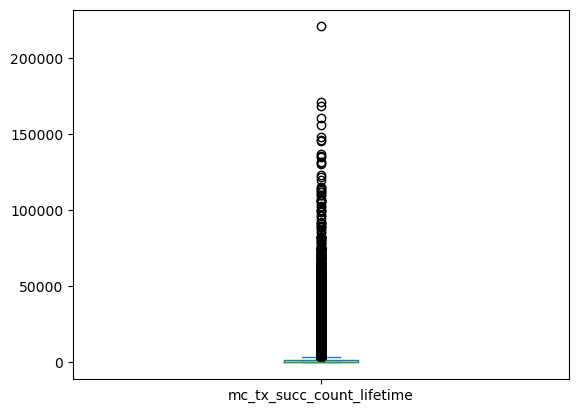

In [57]:
df.groupby('merchant_id').mc_tx_succ_count_lifetime.max().plot(kind='box')

In [49]:
df[df.merchant_id == 'CDQDSZC']

,event_created_at,amount,infraction,merchant_id,mc_weeks_signup,mc_atm_br_tx_out_count_lifetime,mc_credit_transfer_out_br_sum_last_30d,mc_billpay_br_sum_last_15d,mc_billpay_br_count_last_1y,mc_credit_transfer_out_br_sum_last_1y,mc_billpay_br_count_sanction_last_30d,mc_pur_br_count_last_1y,mc_billpay_br_count_last_15d,mc_atm_br_tx_out_count_last_1y,mc_sanction_count_last_2d,mc_credit_transfer_in_rounded_amounts_br_sum_last_30d,mc_pur_br_sum_last_15d,mc_credit_transfer_in_br_sum_last_180d,mc_credit_transfer_out_br_count_lifetime,mc_credit_transfer_out_br_count_sanction_last_30d,mc_credit_transfer_out_br_count_last_15d,mc_pur_br_count_last_15d,mc_pep_count_last_2d,mc_credit_transfer_in_br_sum_last_120d,mc_pur_br_count_lifetime,mc_credit_transfer_in_br_count_last_30d,mc_credit_transfer_in_br_sum_last_90d,mc_credit_transfer_out_br_count_last_1y,mc_billpay_br_sum_last_1y,mc_billpay_br_count_pep_br_last_30d,mc_credit_transfer_in_br_count_pep_br_last_30d,mc_credit_transfer_out_rounded_amounts_br_sum_last_30d,mc_credit_transfer_out_br_sum_last_15d,mc_credit_transfer_in_br_count_sanction_last_30d,mc_credit_transfer_in_br_sum_last_15d,mc_billpay_br_count_lifetime,mc_atm_br_tx_out_count_last_15d,mc_credit_transfer_out_rounded_amounts_br_count_last_30d,mc_credit_transfer_in_br_sum_last_60d,mc_pur_br_sum_last_1y,mc_credit_transfer_out_br_count_pep_br_last_30d,mc_chip_tx_succ_count_30d,mc_chip_tx_decl_ext_count_7d,mc_chip_tx_amount_local_decl_ext_sum_15d,mc_chip_tx_amount_succ_sum_7d,mc_chip_tx_amount_local_succ_sum_7d,mc_chip_tx_amount_local_succ_sum_15d,mc_chip_tx_amount_decl_ext_sum_30d,mc_chip_tx_amount_succ_sum_30d,mc_chip_tx_succ_count_7d,decline_ext_rate_30d,mc_tx_cp_mean_decl_ext_last_31d_mw,mc_tx_amount_sum_last_60m,mc_tx_amount_decl_ext_sum_lifetime,mc_tx_amount_succ_sum_last_30d,mc_tx_succ_count_last_24h,mc_tx_amount_succ_sum_last_14d,mc_tx_amount_fail_sum_last_60m,mc_tx_amount_succ_sum_last_60m,mc_tx_amount_succ_sum_last_2d,mc_tx_amount_succ_sum_last_90d,mc_tx_amount_fail_sum_last_14d,mc_tx_amount_succ_sum_lifetime,mc_tx_amount_pend_sum_last_2d,mc_tx_amount_decl_int_sum_lifetime,mc_tx_amount_sum_last_24h,mc_tx_amount_sum_lifetime,mc_tx_succ_count_last_14d,mc_tx_succ_count_lifetime,mc_tx_amount_succ_sum_last_24h,mc_tx_amount_pend_sum_last_14d,mc_tx_amount_decl_ext_sum_last_14d,mc_tx_amount_decl_ext_sum_last_24h,mc_tx_amount_decl_ext_sum_last_60m,mc_tx_succ_count_last_2d,mc_tx_amount_fail_sum_lifetime,mc_tx_succ_count_last_30d,mc_tx_amount_sum_last_2d,mc_tx_succ_count_last_365d,mc_tx_succ_count_last_60m,mc_tx_amount_sum_last_14d,mc_tx_cp_sum_decl_ext_last_24h,mc_tx_cp_dbt_sum_sq_decl_ext_last_30d,mc_tx_count_decl_ext_last_30d,mc_tx_cp_sum_decl_ext_last_30d,mc_tx_cp_count_decl_ext_last_24h,mc_tx_cp_dbt_sum_sq_fail_last_24h,mc_tx_cp_count_decl_ext_last_30d,mc_tx_cp_dbt_sum_sq_fail_last_14d,mc_merchants_ip_count_dist_shared_last_15d,mcc_sum_succ_1y,mcc_sum_sq_succ_30d,mcc_count_succ_1y,mcc_sum_sq_succ_1y,mcc_sum_succ_30d,is_legal_entity,is_mei,is_person
352374,2024-01-09 16:25:40.505,50000,0,CDQDSZC,27.857143,2.0,0.000000,0.0,0.0,511.153646,0.0,6.0,0.0,2.0,0.0,0.0,0.0,346.030973,22.0,0.0,0.0,0.0,0.0,309.413680,6.0,0.0,256.795627,22.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0,9.487126,17.197891,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.179841e+09,2.912780e+11,18941813,3.765453e+12,1.865025e+08,0,0,1
454226,2023-10-04 22:53:28.849,12000,0,CDQDSZC,14.000000,2.0,35.497244,0.0,0.0,247.873344,0.0,2.0,0.0,2.0,0.0,0.0,0.0,628.568588,15.0,0.0,3.0,0.0,0.0,628.568588,2.0,2.0,628.568588,15.0,0.0,0.0,0.0,0.0,20.816655,0.0,20.866530,0.0,0.0,0,36.828565,4.789058,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.251355e+09,3.016983e+11,20011373,3.796494e+12,1.693653e+08,0,0,1
5

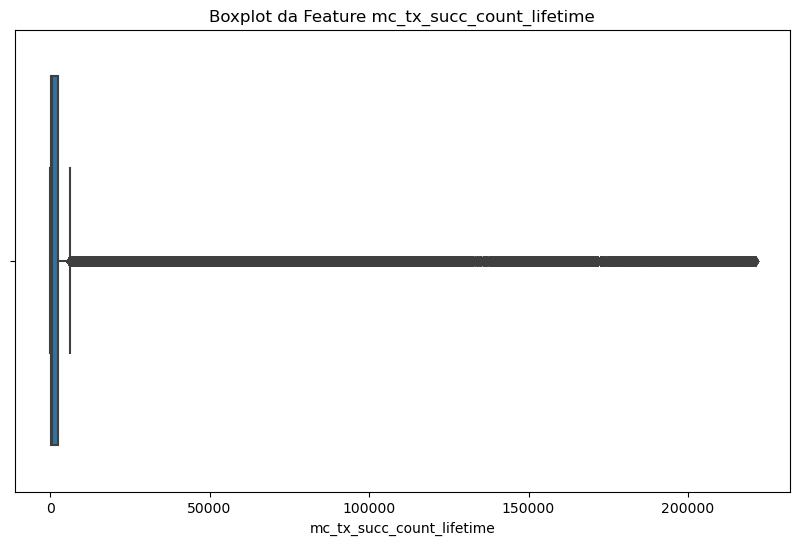

In [18]:
#Number of successful transactions for the lifetime.	
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['mc_tx_succ_count_lifetime'])
plt.title('Boxplot da Feature mc_tx_succ_count_lifetime')
plt.show()

In [25]:
df.amount.describe()

count    9.919650e+05
mean     3.501479e+04
std      1.029484e+05
min      1.000000e+04
25%      1.200000e+04
50%      1.750000e+04
75%      3.000000e+04
max      3.000000e+07
Name: amount, dtype: float64

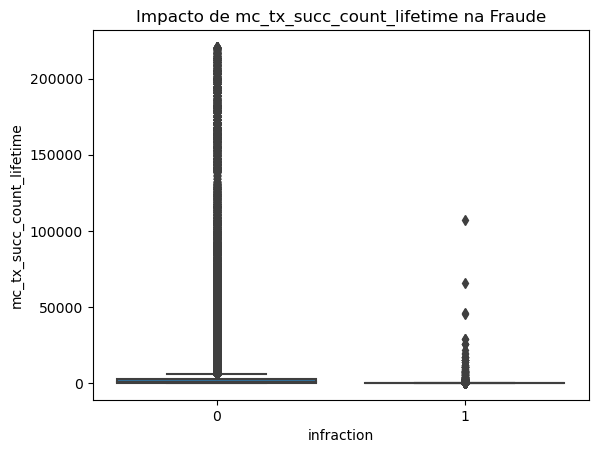

In [21]:
sns.boxplot(x='infraction', y='mc_tx_succ_count_lifetime', data=df)
plt.title('Impacto de mc_tx_succ_count_lifetime na Fraude')
plt.show()

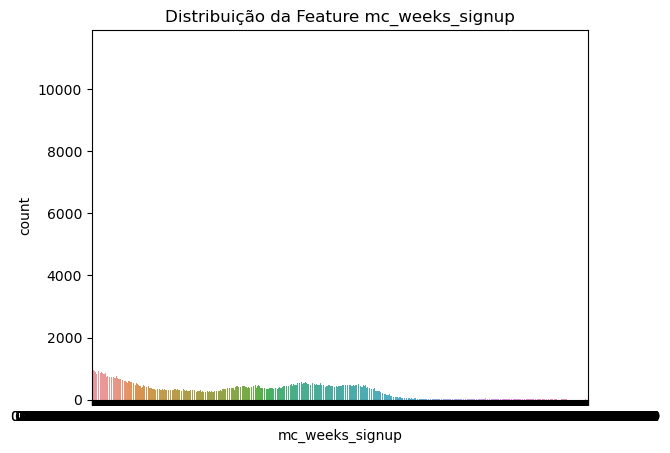

In [22]:
sns.countplot(x='mc_weeks_signup', data=df)
plt.title('Distribuição da Feature mc_weeks_signup')
plt.show()

In [76]:
columns_selected_on_model = ['mc_tx_succ_count_last_365d', 'mc_tx_succ_count_lifetime',
       'mc_weeks_signup', 'mc_tx_succ_count_last_30d',
       'mc_tx_amount_succ_sum_last_30d', 'mc_tx_amount_fail_sum_last_14d',
       'mcc_sum_sq_succ_30d',
       'mc_credit_transfer_out_br_count_pep_br_last_30d',
       'decline_ext_rate_30d', 'mc_pur_br_count_last_1y',
       'mc_billpay_br_count_sanction_last_30d',
       'mc_credit_transfer_in_br_sum_last_180d',
       'mc_credit_transfer_out_br_count_sanction_last_30d',
       'mc_tx_cp_count_decl_ext_last_24h',
       'mc_credit_transfer_in_br_count_last_30d',
       'mc_credit_transfer_in_rounded_amounts_br_sum_last_30d',
       'mc_credit_transfer_in_br_sum_last_60d',
       'mc_tx_amount_sum_last_24h', 'event_created_at', 'amount']

In [77]:
data_eda = df[columns_selected_on_model]

In [78]:
print(data_eda.describe())


       mc_tx_succ_count_last_365d  mc_tx_succ_count_lifetime  mc_weeks_signup  \
count               991965.000000              991965.000000    991965.000000   
mean                  1779.174663                3283.305138       151.055519   
std                   5163.617251               10348.010404       104.730636   
min                      0.000000                   0.000000        -1.000000   
25%                     31.000000                 132.000000        47.142857   
50%                    192.000000                 592.000000       156.000000   
75%                   1250.000000                2529.000000       238.428571   
max                  91341.000000              220899.000000       542.857143   

       mc_tx_succ_count_last_30d  mc_tx_amount_succ_sum_last_30d  \
count              991965.000000                   991965.000000   
mean                  236.880703                     3055.490992   
std                   760.965559                    13759.357511  

In [90]:
data_eda.mc_tx_amount_succ_sum_last_30d.describe()

count    991965.000000
mean       3055.490992
std       13759.357511
min           0.000000
25%          50.576757
50%         524.576643
75%        2312.049698
max      500315.076496
Name: mc_tx_amount_succ_sum_last_30d, dtype: float64

<AxesSubplot:>

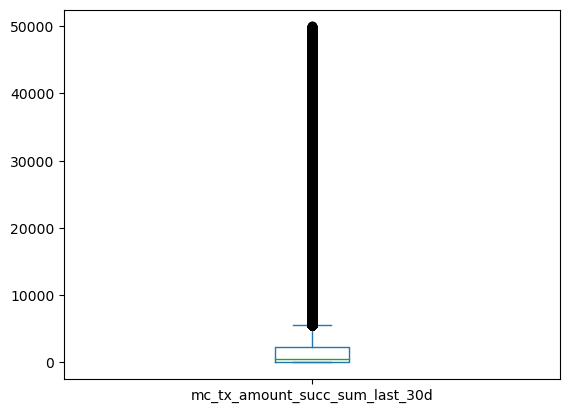

In [89]:
data_eda[data_eda.mc_tx_amount_succ_sum_last_30d< 10].mc_tx_amount_succ_sum_last_30d.plot(kind='box')

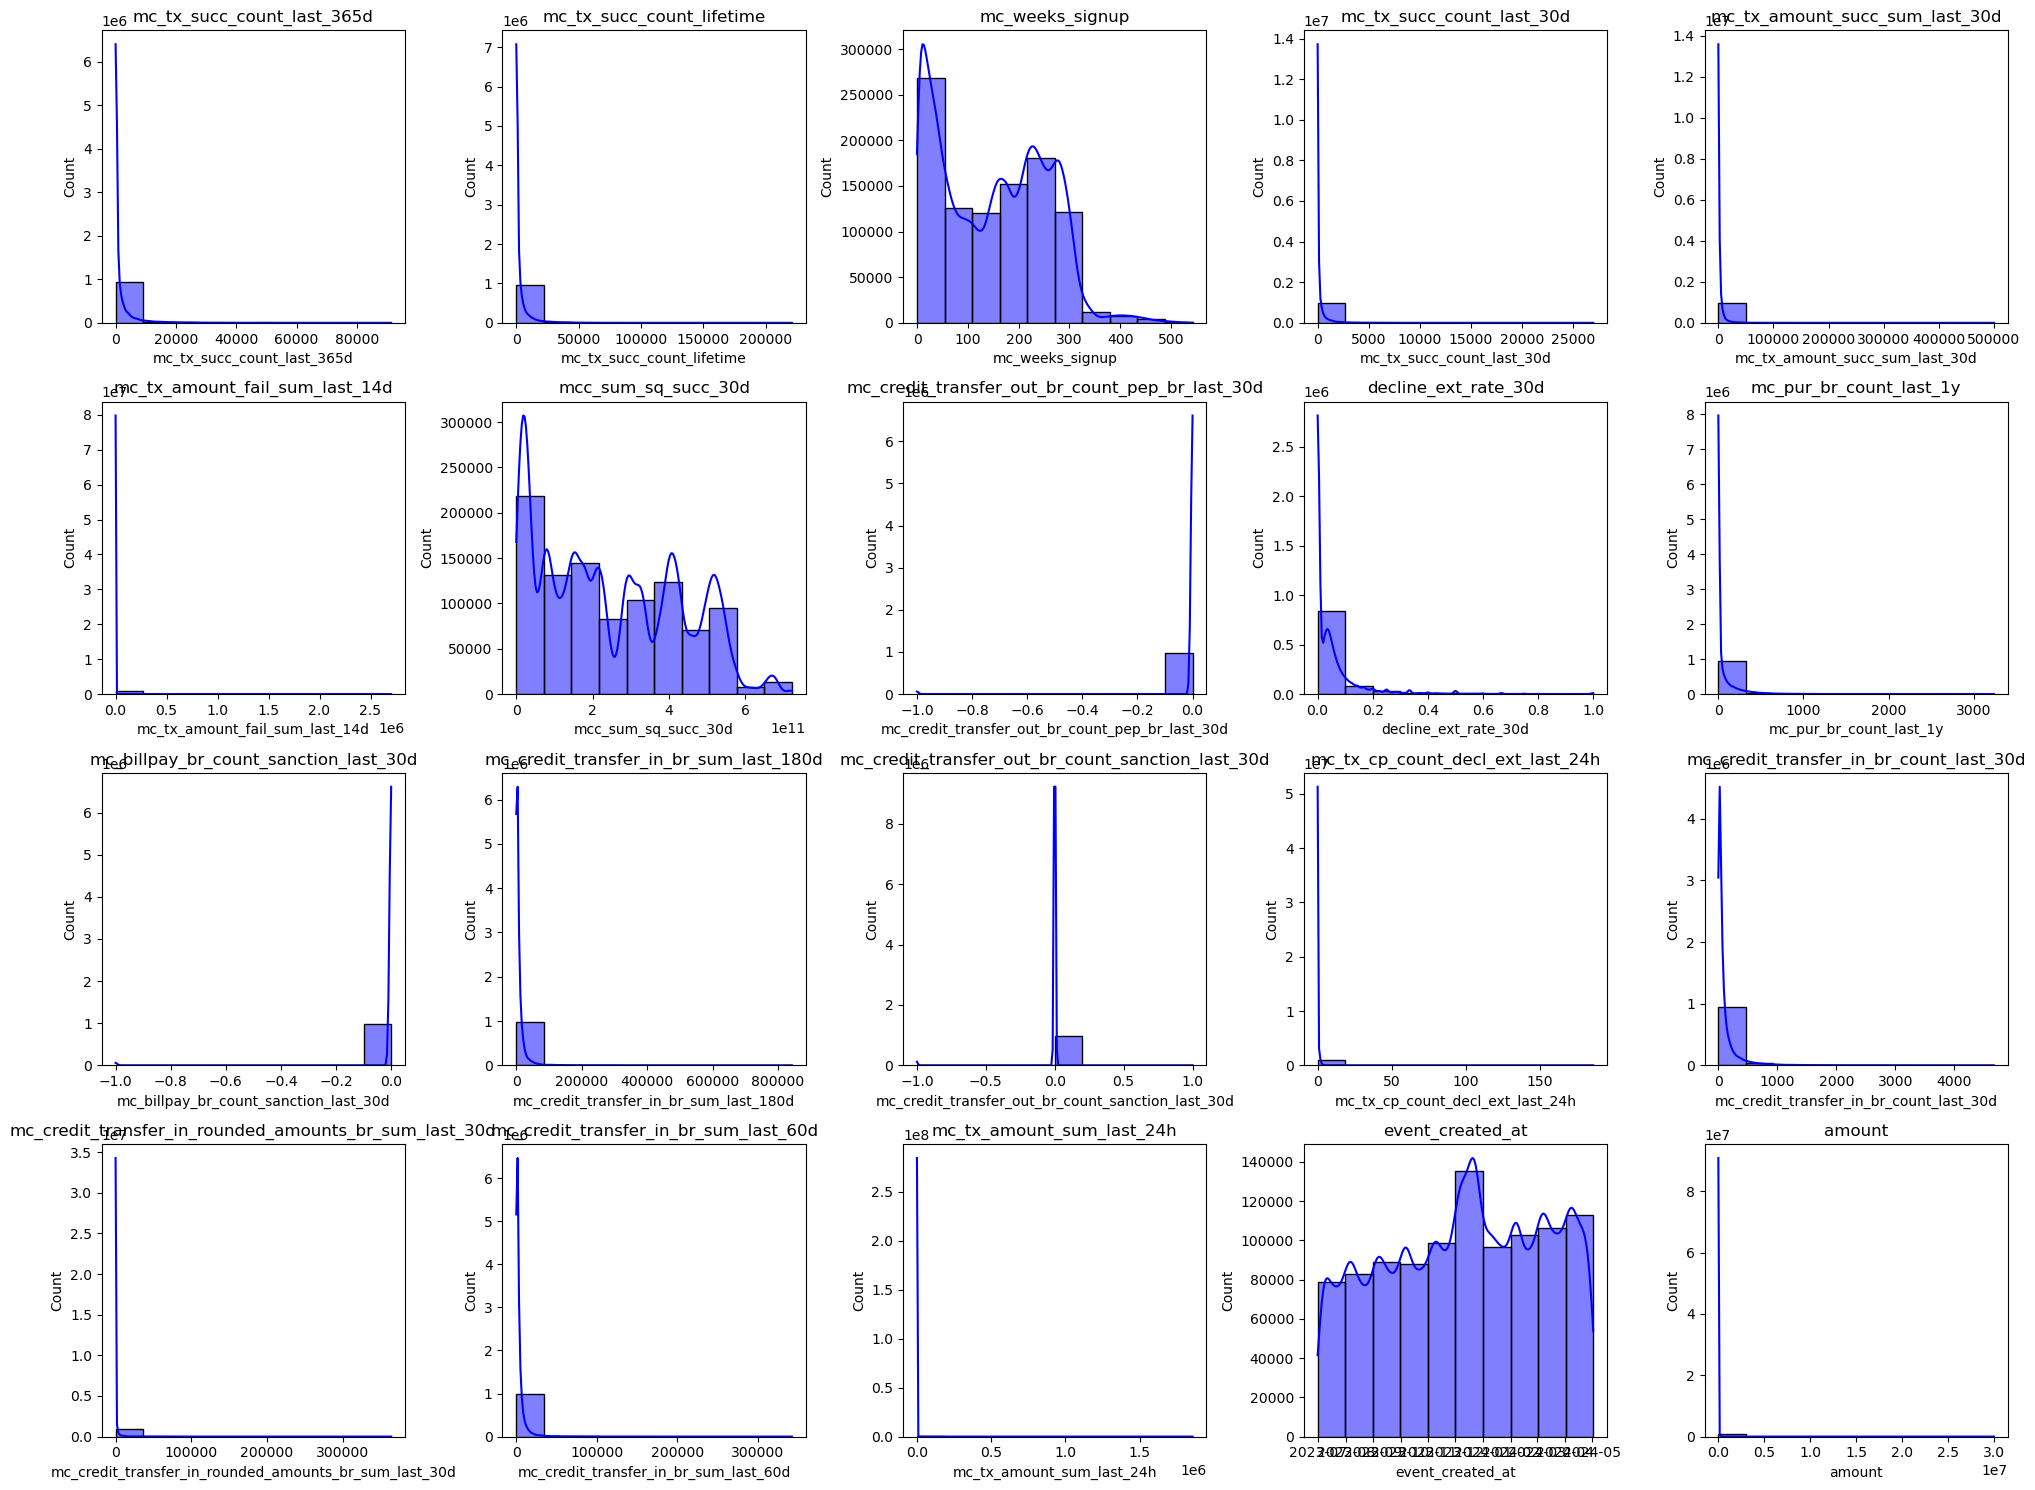

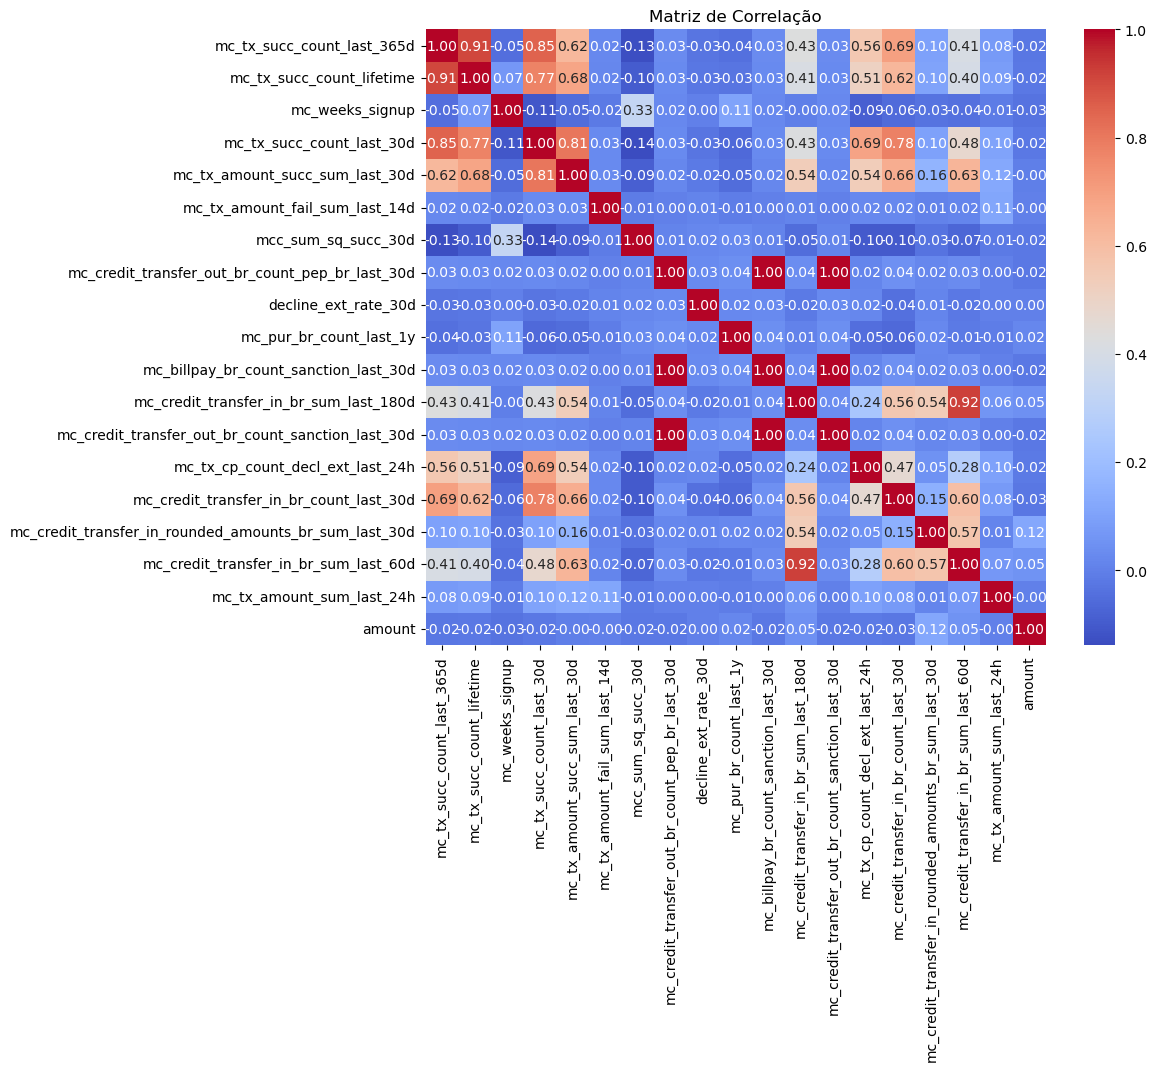

In [81]:

plt.figure(figsize=(20, 15))
for i, column in enumerate(data_eda.columns):
    plt.subplot(4, 5, i + 1)
    sns.histplot(data_eda[column], kde=True, bins=10, color="blue")
    plt.title(column)
    plt.tight_layout()

plt.figure(figsize=(10, 8))
corr_matrix = data_eda.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()